# Описание проекта

Заказчик этого исследования — Министерство культуры Российской Федерации.   
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю. 
Используются данные, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

# Используемые инструменты

pandas  
matplotlib  
numpy  
datetime  
seaborn  

# Задачи исследования
- Посчитать, сколько фильмов выходило в прокат каждый год. Проанализируйте, как эта доля менялась по годам. Выяснить, какой период полнее всего представлен в данных.
- Изучить динамику проката по годам. Найти экстремумы.
- Посчитать среднюю и медианную сумму сборов для каждого года. Сравнить значения и сделать выводы.
- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год?
- Исследовать основные метрики по фильмам, получившим господдержку.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим-типы-данных-в-датафрейме-и-преобразуем-там,-где-это-необходимо." data-toc-modified-id="Проверим-типы-данных-в-датафрейме-и-преобразуем-там,-где-это-необходимо.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверим типы данных в датафрейме и преобразуем там, где это необходимо.</a></span></li><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Работа-с-дубликатами" data-toc-modified-id="Работа-с-дубликатами-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Работа с дубликатами</a></span></li><li><span><a href="#Предобработка-категориальных-значений" data-toc-modified-id="Предобработка-категориальных-значений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Предобработка категориальных значений</a></span></li><li><span><a href="#Предобработка-количественных-значений" data-toc-modified-id="Предобработка-количественных-значений-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Предобработка количественных значений</a></span></li><li><span><a href="#Создание-дополнительных-столбцов-с-расчётами" data-toc-modified-id="Создание-дополнительных-столбцов-с-расчётами-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Создание дополнительных столбцов с расчётами</a></span></li><li><span><a href="#Вывод-по-предобработке-данных" data-toc-modified-id="Вывод-по-предобработке-данных-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Вывод по предобработке данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Динамика-выпуска-фильмов-по-годам" data-toc-modified-id="Динамика-выпуска-фильмов-по-годам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Динамика выпуска фильмов по годам</a></span></li><li><span><a href="#Анализ-динамики-проката-по-годам" data-toc-modified-id="Анализ-динамики-проката-по-годам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ динамики проката по годам</a></span></li></ul></li><li><span><a href="#Исследование-фильмов-с-государственной-поддержкой" data-toc-modified-id="Исследование-фильмов-с-государственной-поддержкой-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование фильмов с государственной поддержкой</a></span></li><li><span><a href="#Общий-вывод-по-исследованию" data-toc-modified-id="Общий-вывод-по-исследованию-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод по исследованию</a></span></li></ul></div>

# Анализ рынка российского проката
Заказчик этого исследования — Министерство культуры Российской Федерации. 
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Выяснить насколько такие фильмы интересны зрителю? 

## Загрузка данных

In [1]:
#сначала загрузим все необходимые библиотеки
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re
import seaborn
import warnings
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
#отключим предупреждения, чтоб не задалбывали
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
#загружаем данные данные о прокатных удостоверениях.
try:
    mkrf_movies=pd.read_csv('E://Data//_Projects//mkrf_movies.csv')
except: 
    print("Файл mkrf_movies.csv найти не удалось")
#загружаем данные данные о прокате в российских кинотеатрах.  
try:
    mkrf_plus=pd.read_csv('E://Data//_Projects//mkrf_shows.csv') 
except:
    print("Файл mkrf_shows.csv найти не удалось")
#для ускорения обработки переведём puNumber в числовой тип:
mkrf_movies['puNumber']=pd.to_numeric(mkrf_movies['puNumber'], errors='coerce',downcast='integer')
mkrf_plus['puNumber']=pd.to_numeric(mkrf_plus['puNumber'], errors='coerce',downcast='integer')
#объединяем данные в один датафрейм
mkrf_movies=pd.merge(mkrf_movies,mkrf_plus, how='outer', on='puNumber')
#посмотрим на что это похоже
display(mkrf_movies.tail(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7476,Я свободен,111023019.0,2019-12-26T12:00:00.000Z,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN
7477,Тридцать,121038419.0,2019-12-26T12:00:00.000Z,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,драма,NaN
7478,(Не)идеальный мужчина,111023119.0,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000000.0,60000000.0,150147502.0,Фонд кино,4.5,"комедия,фантастика,мелодрама",NaN
7479,Эколав,111023219.0,2019-12-26T12:00:00.000Z,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919.0,2019-12-23T12:00:00.000Z,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,219569.0
7481,Сад художника: Американский импрессионизм,126008019.0,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819.0,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819.0,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619.0,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719.0,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн",NaN


**Вывод**

Мы получили весьма "высрой" набор данных, изобилующий пропусками, и это только после самого поверхностного взгляда. Требуется тщательная предобработка данных, прежде чем мы сможем преступить к анализу.

## Предобработка данных


### Проверим типы данных в датафрейме и преобразуем там, где это необходимо.

In [3]:
#Сохраним на будущее, чтобы знать сколько данных мы потеряем в процессе предобработки
aa=mkrf_movies.count()
display(aa)


title                    7486
puNumber                 7485
show_start_date          7486
type                     7486
film_studio              7468
production_country       7484
director                 7477
producer                 6918
age_restriction          7486
refundable_support        332
nonrefundable_support     332
budget                    332
financing_source          332
ratings                  6519
genres                   6510
box_office               3158
dtype: int64

Очевидно, что в преобрзовании нуждаются колонки: show_start_date - лучше сделать в формате даты, и ratings - лучше придать числовой тип, чтобы, например среднии рейтинги считать.

In [5]:
mkrf_movies['show_start_date']=pd.to_datetime(mkrf_movies['show_start_date'],format="%Y-%m-%d")
#посмотрим, можно ли конвертировать "ratings" - в float
print(mkrf_movies['ratings'].value_counts(normalize=True))
#мы увидели, что часть значений имеют процентный вид, приведём их все к одному виду, читая, что 10% рейтинга, это оценка 1.0

try:
    l=mkrf_movies.loc[mkrf_movies['ratings'].str.contains("%")==True]['ratings']
except: 
    print('Cannot mask with non-boolean array containing NA / NaN values')
for i in l:
    mkrf_movies.loc[mkrf_movies['ratings']==i,'ratings']=float(i.rstrip('%')) / 10.0
mkrf_movies['ratings']=pd.to_numeric(mkrf_movies['ratings'],errors='coerce')

6.6    0.047860
6.7    0.047247
6.8    0.040037
7.2    0.038656
6.2    0.037276
         ...   
19%    0.000153
90%    0.000153
62%    0.000153
64%    0.000153
9.1    0.000153
Name: ratings, Length: 94, dtype: float64


**Вывод**

На этом работу с типами данных можно считать законченной. В качестве рекомендации можем предложить министреству Культуры разработать более простую систему кодирования для возрастных ограничений. Как варинат - указанимем минимального возраста зрителей, которым разрешён показ данного фильма. Но учитывая, что никаких математических действий с этим столбцом мы не планируем, можно оставить и так. Если поймём, что надо делать кластеры с учётом значений этого столбца, то погрузимся в его содержание более детально.


### Работа с пропусками

In [6]:
#Посчитаем количество пропусков
has_balnks=mkrf_movies.isna().sum()
has_balnks=has_balnks[has_balnks!=0]
has_balnks

puNumber                    1
film_studio                18
production_country          2
director                    9
producer                  568
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

У нас около 7500 данных, и по 4328 мы не знаем даже каковы кассовые сборы. А бюджет мы знаем только по тем фильмам, где имелось государтсвенное софинансирование. Полноценной картины уже не узнаем, но постараемся выжать максимум полезной информации.

**Вывод**

Принято решение не устранять пропуски, по следующим причинам:
1. Информация о фильме (film_studio,production_country,director) - количество пропусков ничтожно и даже если они все в одной строке, фильм всё равно удастся идентифицировать. Вдобавок это категориальные признаки из достаточно обширных наборов, так что каких-то серьёзных выбросов они не дадут.
2. producer - пропусков много, но они не особенно влияют для нужд нашего исследования. В кинобизнесе компания, крайне малая часть зрителей знает кто продьюсор фильма и ещё для меньшего числа этот фактор как-то влияет на отношение к фильму. Вдобавок гурппировка столь разношёрстна, что не имеет смысла формировать кластеры по именам продьюсоров.
3. бюджет (refundable_support, nonrefundable_support, budget, financing_source) - очевидно, что данные есть только по фильмам с госучастием, иначе бы количество пропусков различалось. Удалять нельзя, так как не сможем сравнивать корректно, например рейтинги и сборы, где они есть, а заполнять средними или какими-то ещё значениями - не соответствует отраслевой специфике. Средний бюджет картины даже в рамках одной страны, одного жанра и одной киностудии может отличаться в разы.
4. Средний рейтинг ставить вместо пропусков некорректно, опять-таки один режисёр может снять фильм который понрафится зрителям, и который нет. Невозможно придумать корректный заменитель пропусков. Аналогичные рассуждения применимы и к жанру, можно догадываться по названию фильма, но это 976 ручных угадаек, скорее повредит, чем поможет.
5. Со сборами тоже понятно - удалять нельзя, это самая "горячая" тема для анализа, но и заполнить какой-то средней или медианной величиной - некорректно, слишком высока роль субъективных фаткоров в том, что касается искусства.

### Работа с дубликатами

In [7]:
#Прежде чем составлять представление о данных, устраним явные дубликаты, от них всё равно никакой пользы
mkrf_movies.drop_duplicates().reset_index(drop=True)
#Посчитаем дубликаты в тех столбцах, где их не должно быть по смыслу
print('Количество фильмов с одинаковыми названиями:',mkrf_movies['title'].duplicated().sum())
print('Количество фильмов с одинаковыми прокартными удостоверениями:',mkrf_movies['puNumber'].duplicated().sum())

Количество фильмов с одинаковыми названиями: 714
Количество фильмов с одинаковыми прокартными удостоверениями: 2


Да, названия часто повторяются. Попробуем разобраться в этом поглубже.

In [8]:
dupes=mkrf_movies['title'].value_counts()
dupes=dupes[dupes>1]
dupes

День святого Валентина_                                  5
Кошки против собак: Месть Китти Галор                    4
Знакомство с Факерами 2.                                 4
Рапунцель: Запутанная история                            4
Секс в большом городе 2                                  4
                                                        ..
Мисс Поттер                                              2
Слепота.                                                 2
Машина времени в джакузи 2                               2
Мученицы                                                 2
Гарри Поттер и тайная комната /По роману Дж.К.Ролинг/    2
Name: title, Length: 558, dtype: int64

Вот мы и выяснили, что на "День святого Валентина_" приходится аж 5 дубликатов. Посмотрим, чем они отличаются:

In [9]:
mkrf_movies.loc[mkrf_movies['title'].str.contains("День святого")==True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810.0,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010.0,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210.0,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210.0,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410.0,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


Похоже, что это одна и та же картина, только с разными прокатными удостоверениями. Видимо их переоформляют с непонятной периодичностью. Кому-то 5 раз, кому-то ни разу. Но мы вяснили, что отличаются только puNumber	и show_start_date. Посмотрим теперь, а различаются ли бюджеты и кассовые сборы? Тогда поймём, можно ли  такие дубликаты можно смело задавить не опасаясь, что мы нанесём датасету непоправимый ущерб.

In [10]:
dupes=dupes[dupes>2]
l=list(dupes.index)
display(mkrf_movies.sort_values(by='title',ascending=True)[mkrf_movies['title'].isin(l)&mkrf_movies['box_office']>0])

C:\Users\Admin\AppData\Local\Temp/ipykernel_17692/3389383095.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3924,Аватар_,121008910.0,2010-05-12 12:00:00+00:00,Художественный,"ХХ век Фокс, Дан Интертейнмент, Гиант Студиос,...",США,Джеймс Кэмерон,"Брук Бретон, Джеймс Кэмерон, Джон Лондау",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"фантастика,боевик,драма",6.950000e+03
630,Американский пирог: Все в сборе,121005012.0,2012-02-27 12:00:00+00:00,Художественный,Юниверсал Пикчерз,США,"Джон Харвитц, Хейден Шлоссберг","Крис Мур, Крэйг Перри",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,комедия,8.000000e+03
885,Арктика 3D,126003112.0,2012-10-18 12:00:00+00:00,Прочие,"МакГиливрэй, Фримен Филмз, Аймакс",США,Грэг МакГиливрэй,"Грег МакГиливрэй, Шон МакГиливрэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.7,"документальный,короткометражка",1.032100e+05
887,Арктика 3D,126003016.0,2016-07-01 12:00:00+00:00,Прочие,"МакГиливрэй, Фримен Филмз, Аймакс",США,Грэг МакГиливрэй,"Грег МакГиливрэй, Шон МакГиливрэй",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.7,"документальный,короткометражка",4.530000e+04
2610,Багровый пик,121015215.0,2015-07-23 12:00:00+00:00,Художественный,Леджендари Пикчерз,США - Канада,Гильермо дель Торо,"Каллум Грин, Джон Дж. ДжашниГильельмо дель Торо",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"ужасы,фэнтези,триллер",2.948430e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,Форсаж 5,121006311.0,2011-04-19 12:00:00+00:00,Художественный,"Дарк Сайд Продакшнз, Ориджинал Филм",США,Джастин Лин,"Вин Дизель, Нил Х.Мориц, Майкл Фоттрелл",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"боевик,триллер,криминал",9.750000e+02
6600,Химера,121032118.0,2019-01-10 12:00:00+00:00,Художественный,"Вандеринг Бард, Сомниа Продакшнз",США,Митци Пейроне,"Ариэль Элвис, Логан Стейнхардт, Али Дзазаери",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.7,"ужасы,фантастика,драма",5.054311e+06
4876,Хочу как ты,121014211.0,2011-08-05 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Биг Кид Пикчерз, Ориджинал ...",США,Дэвид Добкин,"Дэвид Добкин, Джозеф М.Карачиоло младший, Нил ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,"фэнтези,мелодрама,комедия",1.920000e+03
2394,Чем дальше в лес,121029214.0,2014-12-23 12:00:00+00:00,Художественный,"Лукамар Продакшнз, Марк Платт Продакшнз, Уолт ...",США,Роб Маршалл,"Джон ДеЛука, Каллум МакДугалл, Роб Маршалл, Ма...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.9,"мюзикл,фэнтези,драма",5.098766e+07


In [11]:
#удаляем явные дубликаты по прокатному удостоверению
mkrf_movies = mkrf_movies.drop_duplicates(
  subset = ['puNumber'],
  keep = 'last').reset_index(drop = True)


**Вывод**
- Дубликаты в названиях скорее всего появляются когда картине присваивают новое прокатное удостоверение. 
- Они могут возникать, когда выходит новый сезон сериала, например "Рапунцель: запутанная история". 
- Нельзя исключать, что данные на присвоение puNumber приходят в виде списка, куда могут попадать некоторые картины по нескольку раз.

### Предобработка категориальных значений

Посмотрим теперь категориальные значения, на предмет неявных дубликатов и других особенностей.

In [12]:
mkrf_movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [13]:
#Устраним неявные дубликаты:
mkrf_movies['type']=mkrf_movies['type'].replace(' Художественный','Художественный')
mkrf_movies['type']=mkrf_movies['type'].replace(' Анимационный','Анимационный')

In [14]:
cat_subset=['film_studio','production_country','genres','financing_source']
for i in cat_subset:
    display(mkrf_movies[i].unique())

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

**Вывод**

Проблема с категориальными данными, в том, что количество категорий настолько велико и запутано, что делает их практически неинформативными, и непригодными для анализа. Каждый фильм это конечно уникальный объект искусства, но для бизнеса лучше всё-таки их как-то категоризировать в однородные группировки. А от таких категориальных признаков выгоды будет мало.

### Предобработка количественных значений

Посмотрим на диаграмах с усиками, нет ли каких чудовищных выбросов, которые нам все карты спутают.

[Text(0.5, 1.0, 'Кассовые сборы'), Text(0, 0.5, 'Сумма')]

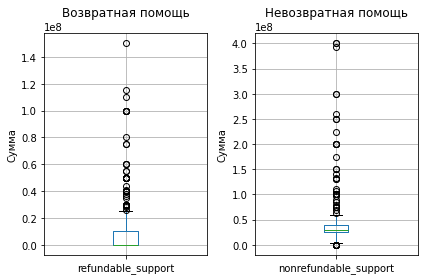

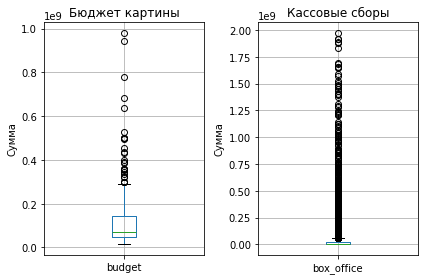

In [24]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, layout='tight')
mkrf_movies.boxplot(column='refundable_support', vert=True, ax=axs[0]).set(title='Возвратная помощь',ylabel ="Сумма")

mkrf_movies.boxplot(column='nonrefundable_support', vert=True, ax=axs[1]).set(title='Невозвратная помощь',ylabel ="Сумма");
plt.show
fig, axs = plt.subplots(nrows= 1 , ncols= 2,layout='tight')
mkrf_movies.boxplot(column='budget', vert=True, ax=axs[0]).set(title='Бюджет картины',ylabel ="Сумма")
mkrf_movies.boxplot(column='box_office', vert=True, ax=axs[1]).set(title='Кассовые сборы',ylabel ="Сумма")


Как и следовало ожидать, выбросов тут богато. Но в глаза бросаются значения, близкие к нулю, а то и меньшие. Это надо исследовать подробнее.

In [16]:
mkrf_movies.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.483000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6517.000000,3.158000e+03
mean,1.351736e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.487955,7.647870e+07
std,3.833231e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.114734,2.403531e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120251e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210154e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09


Наблюдаются значение бюджета и сборов равные нулю, если сборы, например какой-нибудь документалки в СССР могли вообще не оцениваться как класс, то вот бюджет нулевым быть не мог никогда. Посчитаем сколько всего аномально-низких бюджетов и сборов имеет место быть. Как порог отсечения возьмём 5 млн. руб. Наверху мы наблюдаем выброс, уходящий аж к 1-2 миллиардам.

In [17]:
print("Всего картин с аномально-низким бюджетом: ", mkrf_movies[mkrf_movies['budget']<5000000].count()[1])
print("Всего картин с аномально-высоким бюджетом: ", mkrf_movies[mkrf_movies['budget']>1000000000].count()[1])
print("Всего картин с аномально-высокими кассовыми сборами: ", mkrf_movies[mkrf_movies['box_office']>2000000000].count()[1])

Всего картин с аномально-низким бюджетом:  17
Всего картин с аномально-высоким бюджетом:  2
Всего картин с аномально-высокими кассовыми сборами:  6


In [18]:
#теперь сделаем так, чтобы объекты с неизвестным бюджетом и сборами не пропали
mkrf_movies=mkrf_movies.fillna({'budget':35000001})
mkrf_movies=mkrf_movies.fillna({'box_office':1999999999})

<function matplotlib.pyplot.show(close=None, block=None)>

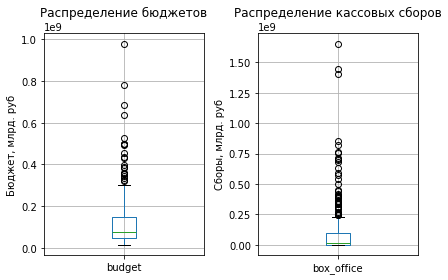

<Figure size 720x360 with 0 Axes>

In [25]:
#Удалим аномалии по бюджету, но сделаем это так, чтобы объекты с неизвестным бюджетом не пропали
mkrf_movies=mkrf_movies[mkrf_movies['budget']>5000000]
mkrf_movies=mkrf_movies[mkrf_movies['budget']<1000000000]
mkrf_movies=mkrf_movies[mkrf_movies['box_office']<2000000000]
#теперь вернём как было, если уж бюджет неизвестен, то это так
mkrf_movies['budget']=mkrf_movies['budget'].replace(35000001, np.NaN)
mkrf_movies['box_office']=mkrf_movies['box_office'].replace(1999999999, np.NaN)
fig, axs = plt.subplots(nrows= 1 , ncols= 2, layout='tight')
plt.figure(figsize=(10, 5))
mkrf_movies.boxplot(column='budget', vert=True,ax=axs[0]).set(title='Распределение бюджетов',ylabel ="Бюджет, млрд. руб")
mkrf_movies.boxplot(column='box_office', vert=True,ax=axs[1]).set(title='Распределение кассовых сборов',ylabel ="Сборы, млрд. руб")
plt.show

**Вывод**

refundable_support и nonrefundable_support - т.е. разные формы бюджетного софинансирования, могут быть какими угодно, даже ноль, так что по ним фильтранцию смысла делать нет, хоть там все значения - почит сплощь выбросы. Но если учесть, что у нас только 300 значений в выборке, то это ни не странно.

По размеру бюджета мы отсекли все аномалии, где бюджет был менее 35 млн. руб., таких картин всего 13. Есть ещё 2 аномалии дороже миллиарда. После того как мы их исключили, распределение выглядит более логичным. 

### Создание дополнительных столбцов с расчётами

In [20]:
# Создадим столбец с информацией о годе проката:
mkrf_movies['p_year']=pd.DatetimeIndex(mkrf_movies['show_start_date']).year
# Создим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма.
# В столбцы войдут первые значения из списка режиссёров и жанров соответственно;
mkrf_movies['boss_dir']=list(mkrf_movies['director'])[0]
mkrf_movies['boss_genre']=list(mkrf_movies['genres'])[0].split(",")[0]
#Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.
mkrf_movies['state_share']=(mkrf_movies['refundable_support']+mkrf_movies['nonrefundable_support'])/mkrf_movies['budget']
display(mkrf_movies.head())
mkrf_movies.shape

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,p_year,boss_dir,boss_genre,state_share
0,Открытый простор,221048915.0,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716.0,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Кевин Костнер,боевик,NaN
2,Особо опасен,221038416.0,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Кевин Костнер,боевик,NaN
3,Особо опасен,221026916.0,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Кевин Костнер,боевик,NaN
4,Особо опасен,221030815.0,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Кевин Костнер,боевик,NaN


(7459, 20)

**Вывод**

Все вспомогательные столбцы готовы для дальнейших вычислений и визуализаций.

In [21]:
#Теперь оценим наши потери в результате физуализации
final_stats=mkrf_movies.count()
stats=pd.concat([final_stats, aa], axis=1)
stats['lost']=1-(stats[0]/stats[1])
stats

,0,1,lost
title,7459,7486.0,0.003607
puNumber,7458,7485.0,0.003607
show_start_date,7459,7486.0,0.003607
type,7459,7486.0,0.003607
film_studio,7441,7468.0,0.003615
production_country,7457,7484.0,0.003608
director,7450,7477.0,0.003611
producer,6891,6918.0,0.003903
age_restriction,7459,7486.0,0.003607
refundable_support,310,332.0,0.066265


### Вывод по предобработке данных
1. Предоставленный датасет оставляет желать лучшего, следуя правилу TITO, на качественное понимание процессов киноиндустрии рассчитывать не приходится.
2. Крайне низкая собираемость информации о бюджетах кинопроектов и кассовых сборах. Я бы предложил собирать эти данные парсингом таких сайтов как кинопоиск, но вот парсинг сайтов мы пока не изучали((
3. Имеющаяся номенклатура категориальных признаков избыточна, и не позволяет качественно группировать объекты исследования, по принадлежности к жанру, стране происхождения, и т.п.
4. Информацию о дате премьеры целесообразно хранить как дату, а не как текст.
5. Классификация возрастных ограничений не очень удобна для машинной обработки, хотя категорий тут немного.
6. Одним и тем же фильмам бывает, что присваиваются разные прокатные удостоверения, что приводит к появлению дубликатов.
7. Датасет изобилует пропусками также в столбцах с рейтингом и жанром. Также рекомендуется парсить Кинопоиск.
8. Были выявлены аномалии числовых значениях размера бюджета фильма, пришлось их отсечь, чтобы не искажали картину. При этом информацию о фильмах, где не было данных о бюджете постарались сохранить.
**9. Так как датасет изначально имел много пропусков в части финансовых показателей, наша фильтрация привела к потере 6,6% данных по этому показателю, считаем это уже много и её сильнее фильтроватьне будем, хотя выбросов всё ещё очень много**

## Исследовательский анализ данных

### Динамика выпуска фильмов по годам

In [44]:
full1=pd.read_csv('E://Data//_Projects//mkrf_movies.csv')
full2=pd.read_csv('E://Data//_Projects//mkrf_shows.csv')
full1['puNumber']=pd.to_numeric(full1['puNumber'], errors='coerce',downcast='integer')
full2['puNumber']=pd.to_numeric(full2['puNumber'], errors='coerce',downcast='integer')
full=pd.merge(full1,full2, how='outer', on='puNumber')
full['p_year']=pd.DatetimeIndex(full['show_start_date']).year

In [45]:
#Посчитаетм сколько всего фильмов вышло, и по скольким есть данные о кассовых сборах
mpy=full.pivot_table(['show_start_date','box_office'],['p_year'],aggfunc=['count'])
mpy.columns = mpy.columns.droplevel(0)
#Определим долю фильмов, по которым известны кассовые сборы
mpy['share']=mpy['box_office']/mpy['show_start_date']*100
display(mpy)

,box_office,show_start_date,share
p_year,,,
2010,105,985,10.659898
2011,109,622,17.524116
2012,128,593,21.585160
2013,184,630,29.206349
2014,279,807,34.572491
2015,465,705,65.957447
2016,526,818,64.303178
2017,357,505,70.693069
2018,475,891,53.310887


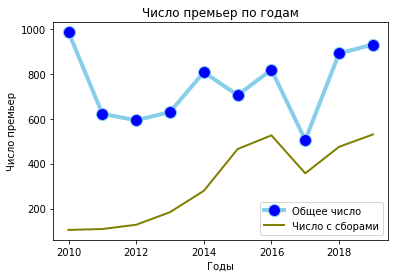

In [46]:
cc=["Общее число","Число с сборами"]
  
# создадим фигуру и оси
fig, ax = plt.subplots()
  
ax.set_title('Число премьер по годам')
  
ax.set_ylabel('Число премьер')
ax.set_xlabel('Годы')
  
# настроим интервалы значений по осям
#ax.set_xlim(2010, 2019)
#ax.set_ylim(70, 1000)
  
# выведем графики по всем фильмам и филтмам где известны кассовые сборы
ax.plot(mpy.index, mpy['show_start_date'],marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
ax.plot(mpy.index, mpy['box_office'], marker='', color='olive', linewidth=2)
ax.legend(cc)
plt.show()

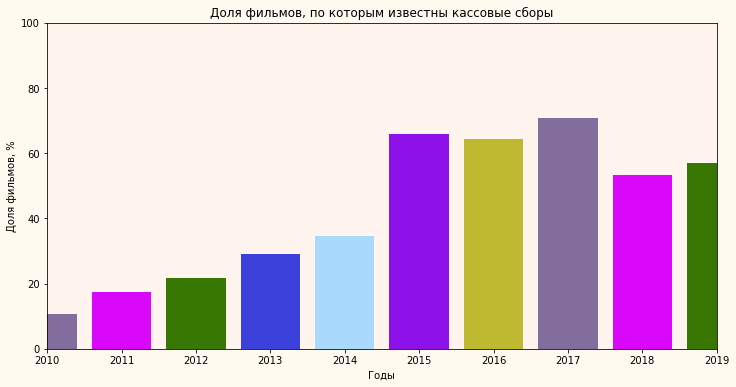

In [47]:
#Теперь посмотрим как измеляась доля фильмав по которым были известны кассовые сборы с течением времени:
fig, ax = plt.subplots()

color_rectangle = np.random.rand(7, 3)    # RGB
ax.bar(mpy.index, mpy['share'], color = color_rectangle)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

ax.set_title('Доля фильмов, по которым известны кассовые сборы')
  
ax.set_ylabel('Доля фильмов, %')
ax.set_xlabel('Годы')
  
# настроем интервалы значений по осям
ax.set_xlim(2010, 2019)
ax.set_ylim(0, 100)
plt.show()

**Вывод**

1. Какие-то выводы можно делать только начиная с 2010 года, всё что до этого вообще покрыто мраком.
2. Доля фильмов, по которым известны кассовые сборы крайне низка, но просматриваетс тренд на её рост, хотя и не очень стойкий.
3. Лучше всего в данных представлен 2016 год, так как там доля фильмов, по которым мы знаем кассоые сборы максимальна, но всё равно лишь 76%.
4. Можно сказать, что число кинопремьер с годами растёт, ведь развиваются технологии создания фильмов, но так как фильм могут снимать и больше года, на графике наблюдаются и пики и провалы.


### Анализ динамики проката по годам

In [48]:
#Посчитаем сумму, среднюю и медиану кассовых соборов по годам
box_py=mkrf_movies.pivot_table(['box_office'],['p_year'],aggfunc=['sum','mean','median'])
box_py.columns =['sum','mean','median']
display(box_py)

,sum,mean,median
p_year,,,
2013,2.032239e+07,1.016119e+07,10161192.55
2014,1.007188e+09,6.714588e+07,4731239.50
2015,4.815747e+09,6.095883e+07,4568857.30
2016,4.957724e+09,8.697762e+07,16814329.46
2017,7.468054e+09,2.133730e+08,30156174.04
2018,7.245903e+09,1.420765e+08,22730244.88
2019,4.854855e+09,8.517289e+07,18878460.81


In [81]:
#Напишем функцию, чтобы строить красивые интерактивные барчарты
def create_barchart(x_nums,y_nums,chart_title,x_axis,y_axis):
    fig, ax=plt.subplots()
    seaborn.barplot(x=x_nums, y=y_nums,ax=ax)
    ax.set(xlabel =x_axis, ylabel = y_axis, title =chart_title)
    fig.set_size_inches(18, 6)
    plt.show()

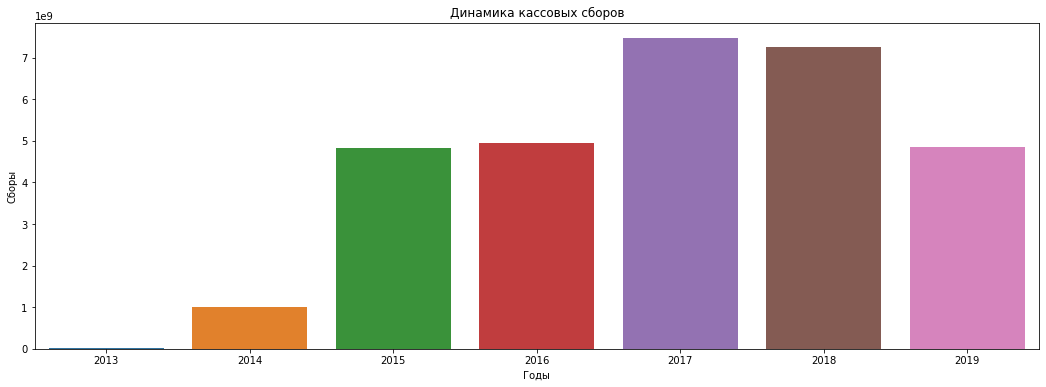

In [82]:
#Построим график суммарных кассовых сборов по годам
create_barchart(box_py.index, box_py['sum'],'Динамика кассовых сборов',"Годы","Сборы")

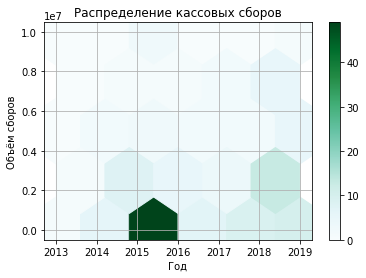

In [85]:
#Даже после нашей фильтрации осталось очень много выбросов. Уберём их для улучшения визуализации.
mkrf_movies_filtered=mkrf_movies[mkrf_movies['box_office']<10000000]
#Простроем диграмму плотности, чтобы визуализировать участок с наиболее часто встречающимися кассовыми сборами
mkrf_movies_filtered.plot(x='p_year', y='box_office', kind='hexbin', gridsize=5, figsize=(6, 4), sharex=False, grid=True)
plt.title('Распределение кассовых сборов')
plt.xlabel('Год')
plt.ylabel('Объём сборов')
plt.show()

**Вывод**

1. *Невооруженным глазом видно, что до 2014 года информация о кассовых сборах почти не поступала. Дальше мы видим, что в годах 2015-2019 имеется весьма существенное отличие средней от медианы, что подтверждает количество выборосов, которые мы видели на графиках во время предобработки.*
2. Кассовые сборы от года к году растут, но это никак не говорит о рынке, так как доля фильмов по которым имеется информация о кассовых сборах не во все годы превышает 60%, и лишь один раз достигает пика в 76% после которого следует мощный откат.
3. Нет смысла говорить о каком-то году с минимальными кассовыми сборами, то как за 10 лет наш кинорынок не сильно изменился, а вот информационное обеспечение МинКульта явно пошло на лад, так что о годах раньше 2014 говорить не приходится, там цифры сборов ничтожно малы и по сути являются выбросами. Максимум сборов приходится на 2018 год. Но на этот  же год приходится локальный минимум по доле фильмов, с известными сборами.
**4. Диаграмма показывает, что есть не очень большое количество филмов, сборы по которым улетают высоко за 10 миллионов рублей, но подавляющее большинство имеет кассу не более 4 млн. руб. и больше всего подобного кино было в 2018-2019 году. А вот в 2014 году, было выпущено максимальное количество фильмов со сборами менее 2 млн. руб. Наметился робкий тренда на повышения кассовых сборов, можно сказать оттлокнулись от дна.**

## Исследование фильмов с государственной поддержкой

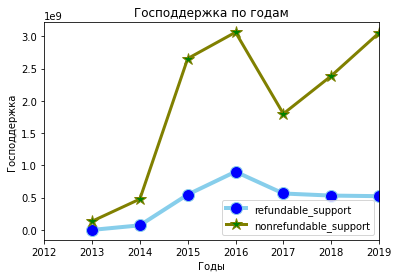

In [87]:
#Посмотрим на динамику господдержки кино по годам
supp=mkrf_movies.pivot_table(['refundable_support','nonrefundable_support'],['p_year'],aggfunc=['sum'])
supp.columns = supp.columns.droplevel(0)
cc=["refundable_support","nonrefundable_support"]
  
# создадим фигуру и оси
fig, ax = plt.subplots()
  
ax.set_title('Господдержка по годам')
  
ax.set_ylabel('Господдержка')
ax.set_xlabel('Годы')
  
# настроим интервалы значений по осям
ax.set_xlim(2012, 2019)
  
# выведем графики по всем фильмам и филтмам где известны кассовые сборы
ax.plot(supp.index, supp['refundable_support'],marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
ax.plot(supp.index, supp['nonrefundable_support'], marker='*', markerfacecolor='green', markersize=12, color='olive', linewidth=3)
ax.legend(cc)
plt.show()

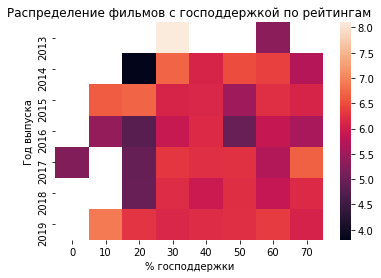

In [100]:
#Для начала выделим фильмы с господдержкой в отдельный дата-фрейм
gosfilm=mkrf_movies.loc[mkrf_movies['state_share']>0]
#Теперь посмотрим как распредлеяются по рейтингам фильмы с госучастием
h=gosfilm.loc[:,['state_share','ratings','p_year']]
#Агреггируем процент господдержки с точностью до 10%
h['share_bin']=round((h['state_share']*10))*10
h['share_bin']=h['share_bin'].astype('int')
h = h.drop(['state_share'], axis=1) 
#Подготовим данные для визуализации
rating_by_support = h.pivot_table( index='p_year', columns='share_bin', values='ratings')
gfg=seaborn.heatmap(rating_by_support)
gfg.set(xlabel ="% господдержки", ylabel = "Год выпуска", title ='Распределение фильмов с господдержкой по рейтингам')
plt.show()

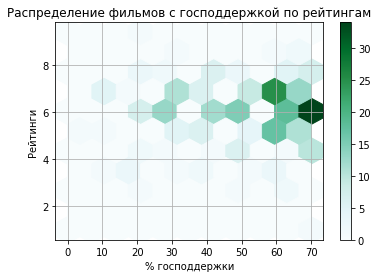

In [98]:
h.plot(x='share_bin', y='ratings', kind='hexbin', gridsize=10, figsize=(6, 4), sharex=False, grid=True).set(xlabel ="% господдержки", ylabel = "Рейтинги", title ='Распределение фильмов с господдержкой по рейтингам')
plt.show()

In [101]:
#Теперь посмотрим что там с кассовыми сборами
h=gosfilm.loc[:,['state_share','show_start_date','p_year','box_office','budget','ratings']]

In [102]:
h['profit']=h['box_office']-h['budget']
h

,state_share,show_start_date,p_year,box_office,budget,ratings,profit
1281,0.333703,2013-10-11 12:00:00+00:00,2013,3.653536e+05,79411900.0,8.1,-7.904655e+07
1448,0.700000,2014-03-28 12:00:00+00:00,2014,2.814000e+04,37142857.0,NaN,-3.711472e+07
1498,0.612691,2013-09-10 12:00:00+00:00,2013,1.995703e+07,176023490.0,5.3,-1.560665e+08
1524,0.690095,2014-05-05 12:00:00+00:00,2014,5.591750e+04,40574140.0,4.2,-4.051822e+07
1792,0.624764,2014-04-23 12:00:00+00:00,2014,2.321000e+05,40015122.0,6.4,-3.978302e+07
...,...,...,...,...,...,...,...
7328,0.166641,2019-11-21 12:00:00+00:00,2019,1.140902e+08,360054850.0,6.9,-2.459647e+08
7373,0.510060,2019-11-26 12:00:00+00:00,2019,1.861716e+07,78422212.0,5.0,-5.980506e+07
7451,0.444444,2019-12-21 12:00:00+00:00,2019,3.875905e+08,270000000.0,7.5,1.175905e+08
7462,0.510204,2019-12-26 12:00:00+00:00,2019,7.177032e+08,980000000.0,6.0,-2.622968e+08


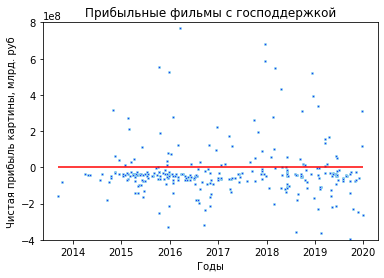

In [108]:
  
# создадим фигуру и оси
fig, ax = plt.subplots()
  
ax.set_title('Прибыльные фильмы с господдержкой')
  
ax.set_ylabel('Чистая прибыль картины, млрд. руб')
ax.set_xlabel('Годы')
  
# настроем интервалы значений по осям
ax.set_ylim(-400000000, 800000000)
  
# выведем графики по всем фильмам и филтмам где известны кассовые сборы
ax.plot(h['show_start_date'], h['profit'],marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=0)
ax.hlines(0, h['show_start_date'].min(), h['show_start_date'].max(), color = 'r')
plt.show()

In [104]:
print("Всего фильмов с гос.поддержкой",h.count()[0])
print("Всего прибыльных фильмов с гос.поддержкой",h[h['profit']>0].count()[0])

Всего фильмов с гос.поддержкой 296
Всего прибыльных фильмов с гос.поддержкой 63


In [105]:
#Посчитаетм маржинальность прибыльных фильмов
h['margin']=h['profit']/h['budget']
display(h.describe())
print("Средняя рентабельность среди коммерчески успешных фильмов с господдержкой=",h[h['margin']>0].median()['margin']*100,"%")

,state_share,p_year,box_office,budget,ratings,profit,margin
count,296.000000,296.000000,2.960000e+02,2.960000e+02,282.000000,2.960000e+02,296.000000
mean,0.519463,2016.652027,1.026007e+08,1.213994e+08,6.022340,-1.879871e+07,-0.320382
std,0.168148,1.629348,2.165461e+08,1.271644e+08,1.169252,1.872564e+08,1.262919
min,0.044043,2013.000000,1.550000e+03,1.446246e+07,1.000000,-7.256988e+08,-0.999983
25%,0.373620,2015.000000,1.039206e+06,4.615388e+07,5.400000,-7.283359e+07,-0.978493
50%,0.591738,2016.000000,1.184531e+07,7.459255e+07,6.200000,-4.345051e+07,-0.853735
75%,0.657895,2018.000000,9.658595e+07,1.489389e+08,6.700000,-1.744135e+07,-0.281182
max,0.784745,2019.000000,1.655038e+09,9.800000e+08,9.400000,1.302560e+09,8.729984


Средняя рентабельность среди коммерчески успешных фильмов с господдержкой= 94.4806458541173 %


C:\Users\Admin\AppData\Local\Temp/ipykernel_17692/2611885925.py:4: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [106]:
display(h.corr()['budget'])

C:\Users\Admin\AppData\Local\Temp/ipykernel_17692/10923172.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



state_share   -0.310297
p_year         0.149965
box_office     0.508372
budget         1.000000
ratings        0.104900
profit        -0.091203
margin         0.125553
Name: budget, dtype: float64

**Вывод**

1. Государство щедро заливает киноотрасль деньгами, причём объёмы безвозвратной помощи растут гораздоб ольшими темпами, чем возвратной, где рост крайне скромный.
2. С господдержкой получаются в основном неплохие фильмы, которые скорее нравятся нашим зрителям, откровенные шедевры встречаются редко, но и откровенных провалов тоже почти нет. Подавляющее большинтсво образует плотное скопление в близи рейтинга 6, что лучше среднего.
3. Лишь 21% фильмов с госучастием собирает в прокате, больше чем было затрачено на производство. При этом средняя рентабельность среди успешных фильмов почти 100%.
4. Корреляции между размером бюджета, рейтингом фильма и коммерческим успехом не обнаружено. По крайней мере о масштабной коррупции здесь говорить не приходится.
5. Исходя из вышесказанного, можно сделать вывод, что кино с господдержкой, это не бизнес, а плата за донесения до населения важных нарративов, и данные показывают, что зритель это принимает благосклонно, хотя его деньги голосуют совсем иначе.

## Общий вывод по исследованию

1. Качество предоставленных данных на низком уровне. Вся методология сбора данных нуждается в значительной доработке. 
Результаты исследования могут оказаться неполными и не дать полной картины.
***1.1. Во время предобрадотки старались сохранить данные по макимуму. Были устранены явные дубликаты по ПУ, дата премьеры была переведена в формат "времени", были наложены лёгкие фильтры по выбросам числовых показателей, в частности фильмы с аномально-низким и высоким бюджетом или запредельными кассовыми сборами. Потеря составила 6,6% по числовым категориям и менее 1% по качественным, где это было возможно.***

2. Рейтинг фильмов с господдержкой откровенно средний. Возможно это связано с недофинансированием отрасли,
а возможно и с тем, что госзаказы гениальные киношники брать не хотят. Нет данных в датасете чтоб углубиться в эту проблему.
3. Откровенные провалы, низкооцениваемые зрителем встречаются весьма редко, также как и громкие истории успеха.
4. Говорить о государственной поддержке кино как о бизнесе не имеет смысла. Почти 80% картин не окупают своего бюджета. Однако, среди тех кто выходит в плюс наблюдается весьма неплохая рентабельность по сравнению с более традиционными отраслями народного хозяйства. Во многом кино - это венчурный бизнес.
5. Размер бюджета кинопроекта никак не коррелирует с его рейтинго или маржинальностью. Было бы гораздо хуже, если бы все крупные проекты оказывались провальными, что дало бы повод задуматься об эффектиности использования бюджетных средств.
